In [182]:
#Importing required libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import statsmodels.api as smt

from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import plot_roc_curve


pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows',300)

### Understanding the Data

In [183]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample.csv')

In [184]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [185]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   id                        int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   arpu_6                    float64
 9   arpu_7                    float64
 10  arpu_8                    float64
 11  onnet_mou_6               float64
 12  onnet_mou_7               float64
 13  onnet_mou_8               float64
 14  offnet_mou_6              float64
 15  offnet_mou_7              float64
 16  offnet_mou_8              float64
 17  roam_ic_mou_6             float64
 18  roam_ic_mou_7             float64
 19  roam_ic_mou_8             float64
 20  roam_og_mou_6             f

## Data Preparation

### Checking missing values

In [114]:
# Checking columns with missing values > 50%
null_values = df.columns[(df.isnull().sum()/len(df))>0.5]
null_values

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')

In [115]:
# Data recharge columns
# Total & Max of recharge for data is blank when there is no data recharge for the specific month. So imputing them with zero
# When there is no recharge of data, count of recharge data is blank. So impute it with zero
# Avg renvenue field is blank when there is no 2g or 3g plan or consumption
data_recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8','max_rech_data_6','max_rech_data_7',
                        'max_rech_data_8', 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','count_rech_2g_6',
                     'count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','arpu_3g_6',
                     'arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8']
for i in data_recharge_cols:
    df[i].fillna('0', inplace = True)

In [116]:
#fb user - when there is no 2g or 3g plans with the user,the fb user is empty. So we can imput with new category no plan
df['fb_user_6'].fillna('2', inplace = True)
df['fb_user_7'].fillna('2', inplace = True)
df['fb_user_8'].fillna('2', inplace = True)

In [117]:
#Creating new category for night pack user
df['night_pck_user_6'].fillna('2', inplace = True)
df['night_pck_user_7'].fillna('2', inplace = True)
df['night_pck_user_8'].fillna('2', inplace = True)

In [118]:
# Date of last recharge for data cannot be computed. So removing them
df.drop(columns = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'], inplace = True)

In [119]:
df.isnull().sum().sort_values(ascending = False)/len(df)

isd_ic_mou_8            0.052901
std_og_t2f_mou_8        0.052901
std_og_t2t_mou_8        0.052901
roam_ic_mou_8           0.052901
std_ic_mou_8            0.052901
roam_og_mou_8           0.052901
std_og_t2c_mou_8        0.052901
loc_og_t2t_mou_8        0.052901
std_ic_t2m_mou_8        0.052901
offnet_mou_8            0.052901
loc_og_t2m_mou_8        0.052901
loc_og_t2f_mou_8        0.052901
std_og_t2m_mou_8        0.052901
std_ic_t2f_mou_8        0.052901
loc_og_t2c_mou_8        0.052901
std_ic_t2o_mou_8        0.052901
og_others_8             0.052901
std_ic_t2t_mou_8        0.052901
loc_ic_t2f_mou_8        0.052901
isd_og_mou_8            0.052901
loc_ic_t2t_mou_8        0.052901
ic_others_8             0.052901
loc_ic_t2m_mou_8        0.052901
spl_og_mou_8            0.052901
std_og_mou_8            0.052901
loc_og_mou_8            0.052901
loc_ic_mou_8            0.052901
spl_ic_mou_8            0.052901
onnet_mou_8             0.052901
std_og_t2c_mou_6        0.039543
spl_og_mou

#### Filling missing values by relevant data

In [120]:
missing = df.columns[(df.isnull().sum()/len(df)) > 0.05]

In [121]:
missing

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8',
       'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'isd_ic_mou_8', 'ic_others_8'],
      dtype='object')

In [122]:
for i in missing:
    df[i].fillna('0', inplace = True)

In [123]:
missing_2 = df.columns[(df.isnull().sum()/len(df)) > 0.036]

In [124]:
missing_2

Index(['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_mou_6', 'std_og_mou_7',
       'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7',
       'og_others_6', 'og_others_7', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2o_mou_6',
  

In [125]:
for i in missing_2:
    df[i].fillna('0', inplace = True)

#### Checking unique values

In [126]:
# Removing columns with the same value in all 70K rows
ar = []
for i in df.columns:
    x = df[i].nunique()
    if x == 1:
        ar.append(i)

In [127]:
ar

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8']

In [128]:
df.drop(columns = ar, inplace = True)

In [129]:
# Removing id column as it will not be useful in analysis
df.drop(columns = 'id', inplace = True)

In [130]:
#Dropping date of last recharge as the data captured in recharge amount
df.drop(columns = ['date_of_last_rech_8','date_of_last_rech_7','date_of_last_rech_6'], inplace = True)

In [131]:
df.isnull().sum().sort_values(ascending = False)/len(df)

churn_probability     0.0
spl_og_mou_7          0.0
total_og_mou_8        0.0
total_og_mou_7        0.0
total_og_mou_6        0.0
og_others_8           0.0
og_others_7           0.0
og_others_6           0.0
spl_og_mou_8          0.0
spl_og_mou_6          0.0
loc_ic_t2t_mou_7      0.0
isd_og_mou_8          0.0
isd_og_mou_7          0.0
isd_og_mou_6          0.0
std_og_mou_8          0.0
std_og_mou_7          0.0
std_og_mou_6          0.0
std_og_t2c_mou_8      0.0
loc_ic_t2t_mou_6      0.0
loc_ic_t2t_mou_8      0.0
std_og_t2c_mou_6      0.0
std_ic_t2t_mou_6      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_6      0.0
std_ic_t2t_mou_8      0.0
std_ic_t2t_mou_7      0.0
loc_ic_mou_8          0.0
loc_ic_t2m_mou_6      0.0
loc_ic_mou_7          0.0
loc_ic_mou_6          0.0
loc_ic_t2f_mou_8      0.0
loc_ic_t2f_mou_7      0.0
loc_ic_t2f_mou_6      0.0
loc_ic_t2m_mou_8      0.0
loc_ic_t2m_mou_7      0.0
std_og_t2c_m

### Checking Data Types

In [132]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 158 columns):
 #   Column              Dtype  
---  ------              -----  
 0   arpu_6              float64
 1   arpu_7              float64
 2   arpu_8              float64
 3   onnet_mou_6         object 
 4   onnet_mou_7         object 
 5   onnet_mou_8         object 
 6   offnet_mou_6        object 
 7   offnet_mou_7        object 
 8   offnet_mou_8        object 
 9   roam_ic_mou_6       object 
 10  roam_ic_mou_7       object 
 11  roam_ic_mou_8       object 
 12  roam_og_mou_6       object 
 13  roam_og_mou_7       object 
 14  roam_og_mou_8       object 
 15  loc_og_t2t_mou_6    object 
 16  loc_og_t2t_mou_7    object 
 17  loc_og_t2t_mou_8    object 
 18  loc_og_t2m_mou_6    object 
 19  loc_og_t2m_mou_7    object 
 20  loc_og_t2m_mou_8    object 
 21  loc_og_t2f_mou_6    object 
 22  loc_og_t2f_mou_7    object 
 23  loc_og_t2f_mou_8    object 
 24  loc_og_t2c_mou_6    object 

In [133]:
cat_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']

In [134]:
num_cols =[]
for i in df.columns:
    if i not in cat_cols:
        num_cols.append(i)

In [135]:
for i in num_cols:
    df[i] = df[i].astype('int')

In [136]:
df.dtypes

arpu_6                 int32
arpu_7                 int32
arpu_8                 int32
onnet_mou_6            int32
onnet_mou_7            int32
onnet_mou_8            int32
offnet_mou_6           int32
offnet_mou_7           int32
offnet_mou_8           int32
roam_ic_mou_6          int32
roam_ic_mou_7          int32
roam_ic_mou_8          int32
roam_og_mou_6          int32
roam_og_mou_7          int32
roam_og_mou_8          int32
loc_og_t2t_mou_6       int32
loc_og_t2t_mou_7       int32
loc_og_t2t_mou_8       int32
loc_og_t2m_mou_6       int32
loc_og_t2m_mou_7       int32
loc_og_t2m_mou_8       int32
loc_og_t2f_mou_6       int32
loc_og_t2f_mou_7       int32
loc_og_t2f_mou_8       int32
loc_og_t2c_mou_6       int32
loc_og_t2c_mou_7       int32
loc_og_t2c_mou_8       int32
loc_og_mou_6           int32
loc_og_mou_7           int32
loc_og_mou_8           int32
std_og_t2t_mou_6       int32
std_og_t2t_mou_7       int32
std_og_t2t_mou_8       int32
std_og_t2m_mou_6       int32
std_og_t2m_mou

### Derived Columns

In [137]:
# Creating total data recharge amount
df['data_recharge_amt_6'] = df['total_rech_data_6']*df['av_rech_amt_data_6']
df['data_recharge_amt_7'] = df['total_rech_data_7']*df['av_rech_amt_data_7']
df['data_recharge_amt_8'] = df['total_rech_data_8']*df['av_rech_amt_data_8']

In [138]:
# Creating total amount (Data recharge + total recharge)
df['total_amt_6'] = df['data_recharge_amt_6'] + df['total_rech_amt_6']
df['total_amt_7'] = df['data_recharge_amt_7'] + df['total_rech_amt_7']
df['total_amt_8'] = df['data_recharge_amt_8'] + df['total_rech_amt_8']

In [139]:
# Creating aveage total amount for months 6,7 & 8
df['avg_total_amt_6_7_8'] = (df['total_amt_6']+df['total_amt_7']+df['total_amt_8'])/3
df['avg_total_amt_6_7_8'].describe()

count    69999.000000
mean       489.862069
std        855.897872
min          0.000000
25%        137.333333
50%        282.333333
75%        562.000000
max      40281.666667
Name: avg_total_amt_6_7_8, dtype: float64

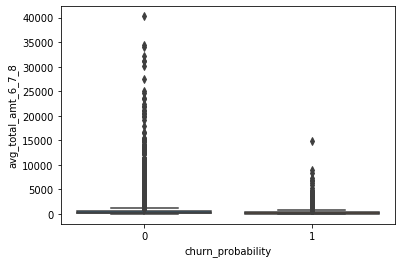

In [140]:
sns.boxplot(y = df['avg_total_amt_6_7_8'], x = df['churn_probability'] )

### Checking outliers

In [141]:
df.shape

(69999, 165)

In [142]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_6,69999.0,282.659924,334.191215,-2258.0,93.000000,197.000000,370.0,27731.000000
arpu_7,69999.0,277.713496,344.344655,-1289.0,86.000000,191.000000,365.0,35145.000000
arpu_8,69999.0,278.395963,351.895915,-945.0,84.000000,192.000000,369.0,33543.000000
onnet_mou_6,69999.0,127.455121,295.087228,0.0,5.000000,30.000000,113.0,7376.000000
onnet_mou_7,69999.0,128.322033,306.296431,0.0,4.000000,29.000000,108.0,8157.000000
onnet_mou_8,69999.0,125.518965,304.959051,0.0,4.000000,27.000000,106.0,10752.000000
offnet_mou_6,69999.0,190.548636,312.878593,0.0,28.000000,89.000000,223.0,8362.000000
offnet_mou_7,69999.0,189.124116,318.468012,0.0,26.000000,85.000000,218.0,7043.000000
offnet_mou_8,69999.0,185.695239,318.426151,0.0,23.000000,83.000000,216.0,14007.000000
roam_ic_mou_6,69999.0,9.284333,56.194327,0.0,0.000000,0.000000,0.0,2850.000000


In [143]:
Q1 = df['avg_total_amt_6_7_8'].quantile(0.05)
Q3 = df['avg_total_amt_6_7_8'].quantile(0.95)
IQR = Q3 -Q1
upper_limit = Q3 + 1.5*Q3
lower_limit = Q1 + 1.5*Q1
df = df[(df['avg_total_amt_6_7_8'] >= lower_limit) & (df['avg_total_amt_6_7_8'] <= upper_limit)]
df.shape

(51434, 165)

In [144]:
#Removing derived columns
derived_cols = ['data_recharge_amt_6','data_recharge_amt_7','data_recharge_amt_8',
                 'total_amt_6','total_amt_7','total_amt_8','avg_total_amt_6_7_8']
df = df.drop(columns = derived_cols, axis =1)

### Univariate/ Bivariate Analysis

In [145]:
churn = sum(df.churn_probability)/len(df.churn_probability)*100
churn

8.171637438270404

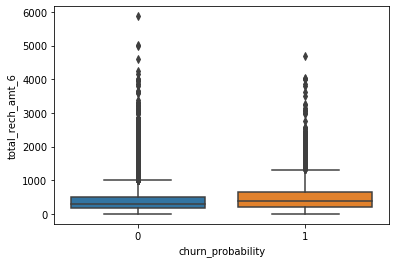

In [146]:
sns.boxplot(x = df.churn_probability, y = df.total_rech_amt_6)
plt.show()

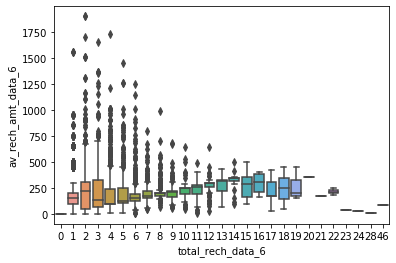

In [147]:
sns.boxplot(x = df.total_rech_data_6, y = df.av_rech_amt_data_6)
plt.show()

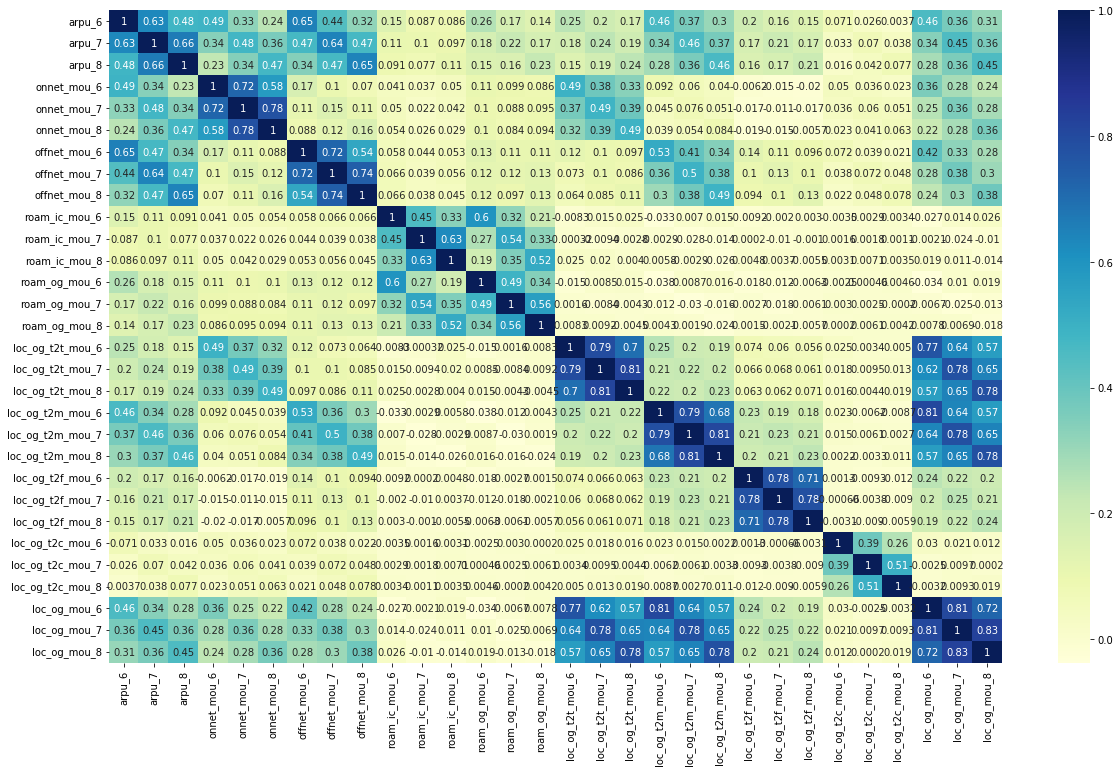

In [148]:
num_cols_1 = num_cols[:30]
num1_df = df[num_cols_1]
cor = num1_df.corr()
plt.figure(figsize = (20,12))
sns.heatmap(cor, cmap = 'YlGnBu', annot = True)
plt.show()

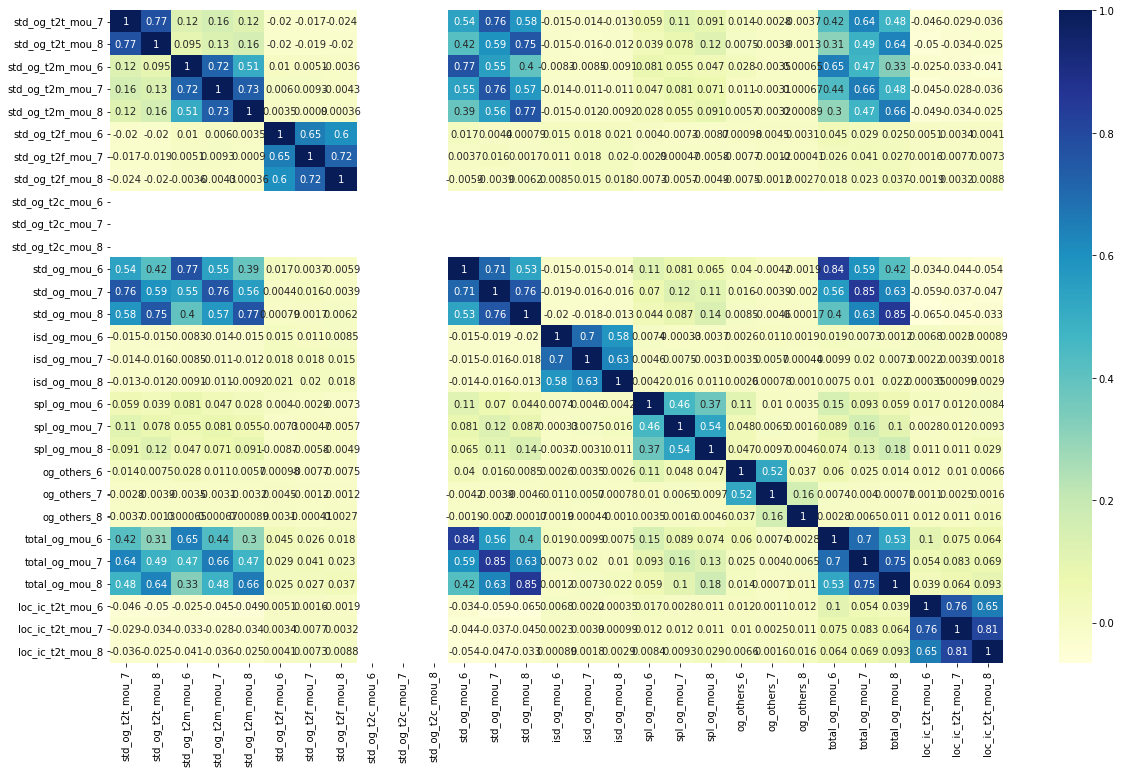

In [149]:
num_cols_2 = num_cols[31:60]
num2_df = df[num_cols_2]
cor = num2_df.corr()
plt.figure(figsize = (20,12))
sns.heatmap(cor, cmap = 'YlGnBu', annot = True)
plt.show()

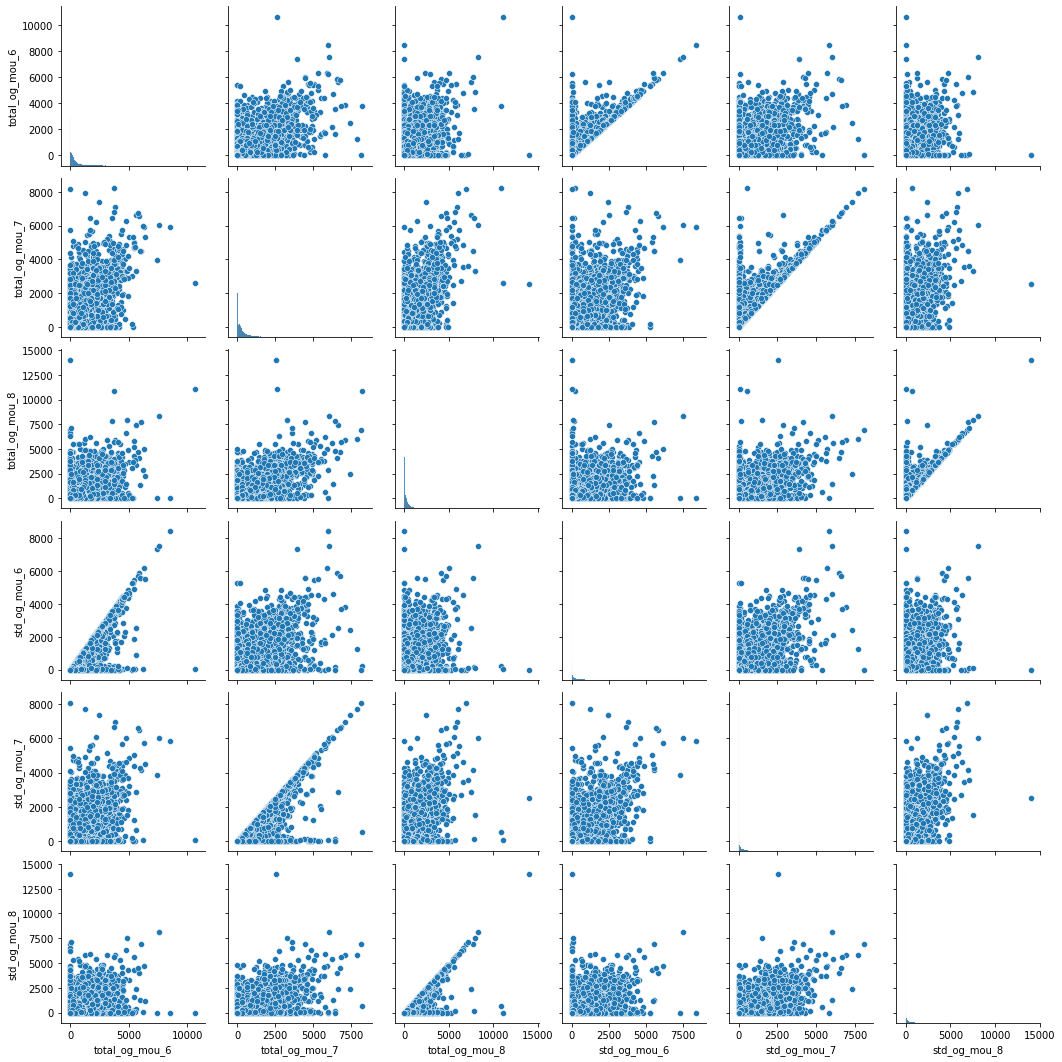

In [150]:
# Highly correlated variables 
high_cor = df[['total_og_mou_6','total_og_mou_7','total_og_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8']]
sns.pairplot(high_cor)
plt.show()

#### Current Churn rate is at 8.2%

### Preprocessing the data

In [151]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51434 entries, 3 to 69998
Data columns (total 158 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   arpu_6              int32 
 1   arpu_7              int32 
 2   arpu_8              int32 
 3   onnet_mou_6         int32 
 4   onnet_mou_7         int32 
 5   onnet_mou_8         int32 
 6   offnet_mou_6        int32 
 7   offnet_mou_7        int32 
 8   offnet_mou_8        int32 
 9   roam_ic_mou_6       int32 
 10  roam_ic_mou_7       int32 
 11  roam_ic_mou_8       int32 
 12  roam_og_mou_6       int32 
 13  roam_og_mou_7       int32 
 14  roam_og_mou_8       int32 
 15  loc_og_t2t_mou_6    int32 
 16  loc_og_t2t_mou_7    int32 
 17  loc_og_t2t_mou_8    int32 
 18  loc_og_t2m_mou_6    int32 
 19  loc_og_t2m_mou_7    int32 
 20  loc_og_t2m_mou_8    int32 
 21  loc_og_t2f_mou_6    int32 
 22  loc_og_t2f_mou_7    int32 
 23  loc_og_t2f_mou_8    int32 
 24  loc_og_t2c_mou_6    int32 
 25  loc_og_t2c_mou_7    i

In [152]:
# Test train split
x = df.drop('churn_probability', axis =1)
y = df['churn_probability']
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [153]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(41147, 157)
(41147,)
(10287, 157)
(10287,)


In [154]:
# Scaling the train data

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [155]:
smt = SMOTEENN()
x_train_resampled, y_train_resampled = smt.fit_resample(x_train, y_train)

In [156]:
x_train.shape

(41147, 157)

In [157]:
x_train_resampled.shape

(65208, 157)

### Logistics Regression

In [158]:
lr = LogisticRegression(max_iter=1000, tol=0.001, solver='sag')
lr.fit(x_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, solver='sag', tol=0.001)

In [159]:
lr.score(x_train_resampled, y_train_resampled)

0.8702613176297387

In [160]:
lr.score(x_test,y_test)

0.7404491105278507

In [161]:
def model_evaluation(y_true,y_pred):
    confusion = metrics.confusion_matrix(y_true,y_pred)
    TP = confusion[1,1]
    TN = confusion[0,0]
    FP = confusion[0,1]
    FN = confusion[1,0]
    accuracy = metrics.accuracy_score(y_true,y_pred)
    sensitivity = TP / float(TP+FN)
    specificity = TN / float(TN+FP)
    return accuracy, sensitivity, specificity

#### Logistics Regression without PCA gives 87% accuracy (train) & 74% accuracy (test)

### PCA

In [162]:
pca = PCA(random_state=50)
pca.fit(x_train_resampled)

PCA(random_state=50)

In [163]:
pca.components_

array([[ 7.75443393e-03,  3.98735075e-02,  6.46478468e-02, ...,
         1.14815442e-01,  1.30706790e-01,  1.22209391e-01],
       [ 1.93686212e-01,  2.19663943e-01,  1.69452266e-01, ...,
         1.74612143e-02,  1.46179974e-02,  6.49640199e-03],
       [-1.01802527e-01, -5.81389584e-02,  2.89054655e-02, ...,
        -1.99863144e-02, -3.62916664e-02, -4.17422570e-02],
       ...,
       [-0.00000000e+00, -4.95966254e-17, -1.29810553e-16, ...,
        -2.04709783e-18, -5.92543226e-18, -6.76583374e-17],
       [ 0.00000000e+00,  3.14112709e-17, -8.71666167e-17, ...,
        -3.67784756e-17,  1.33874672e-16, -1.39708991e-16],
       [ 0.00000000e+00, -1.41528916e-16,  6.39395170e-17, ...,
        -1.22619197e-16,  1.78765530e-16, -1.49660152e-18]])

In [164]:
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.10843124 0.20926449 0.27040509 0.3212193  0.36412533 0.40296933
 0.43382097 0.46456187 0.4885687  0.51135067 0.53246861 0.55191884
 0.57020509 0.58660306 0.60216767 0.61674559 0.63051409 0.64349938
 0.65612554 0.66852111 0.68060653 0.69224276 0.7037048  0.71458037
 0.72457512 0.73437549 0.7437494  0.75262594 0.761334   0.76966052
 0.77783981 0.78564117 0.7933323  0.8007249  0.80772514 0.81423882
 0.82069718 0.82696846 0.83315041 0.83908683 0.84477006 0.85027518
 0.85555333 0.86049543 0.86542392 0.87032336 0.87496775 0.8795539
 0.88385091 0.888009   0.89209124 0.89575644 0.89940327 0.90296223
 0.90636624 0.90970075 0.91300251 0.91613947 0.91916622 0.92217277
 0.92508193 0.92794767 0.93077525 0.93348213 0.93613915 0.93875084
 0.94127755 0.94378519 0.94619244 0.94854869 0.9506991  0.95280934
 0.95489408 0.95689836 0.95888557 0.96080182 0.96267914 0.96454188
 0.9663471  0.96809374 0.969779   0.9714435  0.97296214 0.9744457
 0.97587023 0.97725588 0.97862579 0.9799547  0.98126872 0.982465

Text(0, 0.5, 'Cumulative Variance')

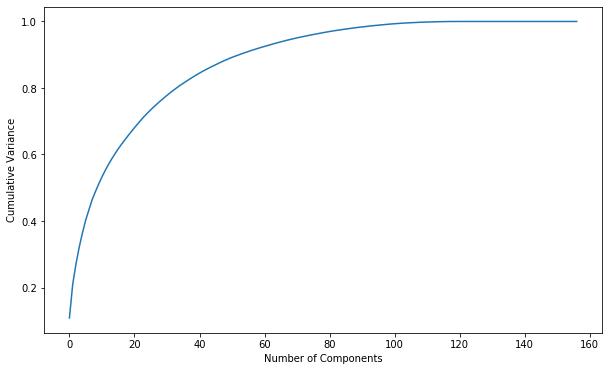

In [165]:
# Plotting the scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

#### 60 components describe 90% of variance in the data

In [166]:
# PCA with 60 components

pca_final = IncrementalPCA(n_components=50)
x_train_pca = pca_final.fit_transform(x_train_resampled)
x_test_pca = pca_final.transform(x_test)

### Selecting Hyper parameter C for Log Reg 

In [167]:

folds = KFold(n_splits=5, shuffle=True, random_state=4)
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(x_train_pca, y_train_resampled)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [168]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.316615,0.036793,0.009042,0.002576,0.01,{'C': 0.01},0.893586,0.883596,0.884844,0.888611,0.889511,0.888030,0.003555,6,0.887847,0.890986,0.888537,0.887922,0.888531,0.888765,0.001148
1,0.479541,0.061160,0.011136,0.003692,0.1,{'C': 0.1},0.893719,0.883730,0.884977,0.889006,0.889911,0.888269,0.003588,1,0.887881,0.890720,0.888171,0.887989,0.888697,0.888691,0.001053
2,0.539134,0.067169,0.007913,0.007130,1,{'C': 1},0.892919,0.883596,0.885109,0.889269,0.889511,0.888081,0.003341,5,0.887847,0.890654,0.888171,0.887989,0.888763,0.888685,0.001033
3,0.544561,0.036971,0.006064,0.004234,10,{'C': 10},0.892786,0.883730,0.884844,0.889401,0.889644,0.888081,0.003338,4,0.887980,0.890621,0.888204,0.887955,0.888531,0.888658,0.001003
4,0.662319,0.064642,0.008563,0.005494,100,{'C': 100},0.892919,0.883730,0.884844,0.889401,0.889644,0.888108,0.003376,3,0.888014,0.890555,0.888238,0.888022,0.888497,0.888665,0.000961
5,0.717848,0.069560,0.010082,0.002801,1000,{'C': 1000},0.892919,0.883730,0.884977,0.889401,0.889644,0.888134,0.003351,2,0.888014,0.890555,0.888238,0.888022,0.888497,0.888665,0.000961


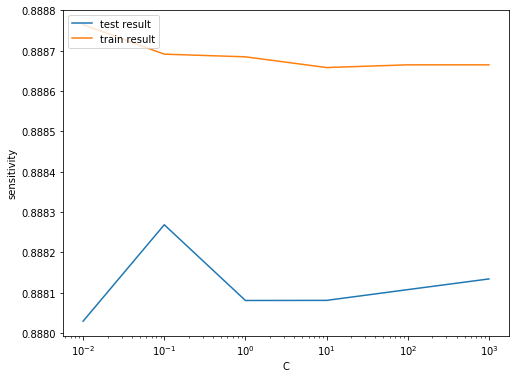

In [169]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [170]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print(best_score)
print(best_C)

0.8882685890715276
0.1


In [171]:
pca.components_

array([[ 7.75443393e-03,  3.98735075e-02,  6.46478468e-02, ...,
         1.14815442e-01,  1.30706790e-01,  1.22209391e-01],
       [ 1.93686212e-01,  2.19663943e-01,  1.69452266e-01, ...,
         1.74612143e-02,  1.46179974e-02,  6.49640199e-03],
       [-1.01802527e-01, -5.81389584e-02,  2.89054655e-02, ...,
        -1.99863144e-02, -3.62916664e-02, -4.17422570e-02],
       ...,
       [-0.00000000e+00, -4.95966254e-17, -1.29810553e-16, ...,
        -2.04709783e-18, -5.92543226e-18, -6.76583374e-17],
       [ 0.00000000e+00,  3.14112709e-17, -8.71666167e-17, ...,
        -3.67784756e-17,  1.33874672e-16, -1.39708991e-16],
       [ 0.00000000e+00, -1.41528916e-16,  6.39395170e-17, ...,
        -1.22619197e-16,  1.78765530e-16, -1.49660152e-18]])

### Logistics Regression with PCA

In [172]:
logistic_pca = LogisticRegression(C=best_C)
log_pca_model = logistic_pca.fit(x_train_pca, y_train_resampled)

In [173]:
y_train_pred = log_pca_model.predict(x_train_pca)
model_evaluation(y_train_resampled,y_train_pred)

(0.8568580542264753, 0.8889391480190512, 0.8132126696832579)

In [174]:
y_test_pred = log_pca_model.predict(x_test_pca)
model_evaluation(y_test,y_test_pred)

(0.7253815495285312, 0.8529048207663782, 0.714496729267778)

#### Accuracy with PCA:
Train Data:
Accuracy:- 0.86
Sensitivity:- 0.89
Specificity:- 0.81

Test data:
Accuracy:- 0.72
Sensitivity:- 0.85
Specificity:- 0.71

### Random Forest with PCA

In [ ]:
rfc = RandomForestClassifier(random_state=101, n_jobs=-1, oob_score = True)

params = {
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [5, 20, 50],
    'max_features': [3, 4, 5],
    'n_estimators': [50, 100]
}

grid_search = GridSearchCV(estimator=rfc, param_grid=params, 
                          cv=3, n_jobs=-1, verbose=1, scoring = "recall")
grid_search.fit(x_train_pca,y_train_resampled)
rfc_best = grid_search.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [ ]:
grid_search.best_params_

In [ ]:
rfc_best.fit(x_train_pca, y_train_resampled)
y_train_pred_rf = rfc_best.predict(x_train_pca)
model_evaluation(y_train_resampled,y_train_pred_rf)

In [ ]:
y_test_pred_rf = rfc_best.predict(x_test_pca)
model_evaluation(y_test,y_test_pred_rf)

#### Test Data Accuracy - 0.86, Sensitivity - 0.72, Specificity 0.87

### Random Forest without PCA

In [176]:
rfc_best.fit(x_train_resampled, y_train_resampled)
y_train_pred_rf = rfc_best.predict(x_train_resampled)
model_evaluation(y_train_resampled,y_train_pred_rf)

NameError: name 'rfc_best' is not defined

In [ ]:
y_test_pred_rf = rfc_best.predict(x_test)
model_evaluation(y_test,y_test_pred_rf)

#### Test Data Accuracy - 0.89, Sensitivity - 0.76, Specificity 0.90

#### Comparing the logistics Regression model and Random Forest with & without PCA,
##### Accuracy is higher for Random Forest but the sensitivity score is more in Logistics regression

### Submission File

In [72]:
test = pd.read_csv('test.csv')

In [73]:
sample.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [74]:
test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [76]:
df1 = df.drop('churn_probability', axis = 1)
var = df1.columns
var.shape

(157,)

In [79]:
test.isnull().sum().sort_values(ascending = False)

arpu_3g_6                   22415
count_rech_2g_6             22415
date_of_last_rech_data_6    22415
av_rech_amt_data_6          22415
fb_user_6                   22415
arpu_2g_6                   22415
total_rech_data_6           22415
night_pck_user_6            22415
max_rech_data_6             22415
count_rech_3g_6             22415
av_rech_amt_data_7          22294
count_rech_3g_7             22294
arpu_3g_7                   22294
arpu_2g_7                   22294
night_pck_user_7            22294
count_rech_2g_7             22294
max_rech_data_7             22294
total_rech_data_7           22294
date_of_last_rech_data_7    22294
fb_user_7                   22294
count_rech_2g_8             22078
max_rech_data_8             22078
night_pck_user_8            22078
total_rech_data_8           22078
arpu_2g_8                   22078
date_of_last_rech_data_8    22078
arpu_3g_8                   22078
count_rech_3g_8             22078
fb_user_8                   22078
av_rech_amt_da

In [80]:
test_new = test.fillna(0)

In [81]:
sub_data = test_new.set_index('id')[var]
sub_data.shape

(30000, 157)

In [82]:
sub_data = scaler.transform(sub_data)

In [84]:
sub_data_pca = pca_final.transform(sub_data)

In [86]:
test['churn_probability'] = log_pca_model.predict(sub_data_pca)

In [87]:
output = test[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [88]:
output.to_csv('churn_solution.csv', index = False)

In [186]:
test['churn_probability'] = rfc_best.predict(sub_data_pca)

In [187]:
output = test[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [188]:
output.to_csv('churn_solution_rfc.csv', index = False)

### Reccomendations

1. No of days since last recharge has more impact on the cutsomer churn rate. Focusing on this will help to retain the customers
2. As the recharge amount is decreased in order of 6,7,8, the likelihood of churning is high. Recharge offers can be provided to customers where there is decline in recharge amount is obsorved
3. 3g volume drop also is an indication of customer to churn. 3G data plans can be improved
4. As the age of the customer increases(no of days the customer using the network), they are more likely to stay. So focusing more on new customers will help to reduce the churn rate
5. Model has sensitivity of 86% (would predict the 86% of customers who are likely to churn)
6. High important features are 'aon', 'no of days since last recharge', '3g data volume', 'avg revenue','avg recharge amt'